In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [3]:
df = pd.read_csv('117 01Students.csv')
df

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


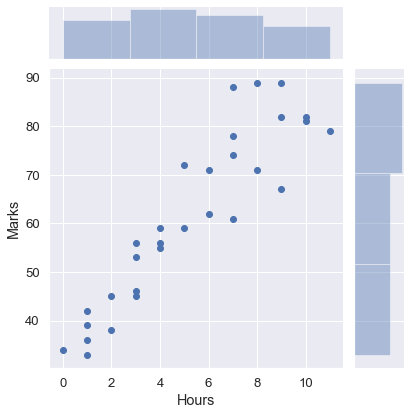

In [7]:
sns.jointplot(x='Hours', y='Marks', data=df)

In [8]:
x = df['Hours'].values.reshape(-1, 1)
y = df['Marks']

In [9]:
x

array([[ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 4],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 8],
       [ 8],
       [ 9],
       [ 9],
       [ 9],
       [10],
       [10],
       [11]], dtype=int64)

In [10]:
y

0     34
1     36
2     33
3     39
4     42
5     45
6     38
7     45
8     53
9     46
10    56
11    59
12    55
13    56
14    72
15    59
16    62
17    71
18    78
19    88
20    61
21    74
22    71
23    89
24    82
25    67
26    89
27    81
28    82
29    79
Name: Marks, dtype: int64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
m = LinearRegression()
m.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_predict = m.predict(x_test)
y_predict

array([85.04609767, 59.95823825, 75.0109539 , 64.97581013, 49.92309448,
       49.92309448, 85.04609767, 80.02852579, 54.94066636])

In [16]:
y_test

27    81
15    59
23    89
17    71
8     53
9     46
28    82
24    82
12    55
Name: Marks, dtype: int64

In [15]:
x_test

array([[10],
       [ 5],
       [ 8],
       [ 6],
       [ 3],
       [ 3],
       [10],
       [ 9],
       [ 4]], dtype=int64)

In [17]:
m.score(x_train, y_train)

0.8111744903394345

In [18]:
m.score(x_test, y_test)

0.8538655334937386

In [19]:
from sklearn.metrics import mean_squared_error

In [21]:
mean_squared_error(y_test, y_predict)

31.922262350145516

In [22]:
np.sqrt(mean_squared_error(y_test, y_predict))

5.649978969000284

In [28]:
m.predict([[9.6]])

array([83.03906892])

In [30]:
m.coef_

array([5.01757188])

In [32]:
m.intercept_

34.87037882245551

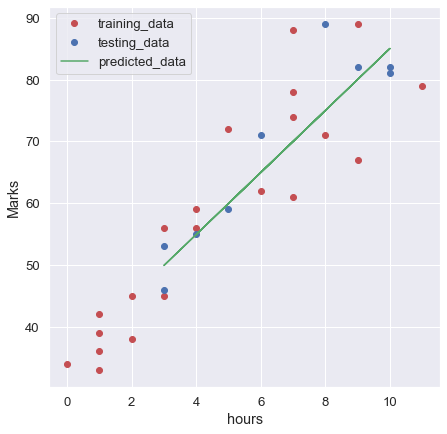

In [38]:
plt.plot(x_train, y_train, 'ro', label='training_data')
plt.plot(x_test, y_test, 'bo', label='testing_data')
plt.plot(x_test, y_predict, 'g-', label='predicted_data')
plt.xlabel('hours')
plt.ylabel('Marks')
plt.legend()